In [9]:
using Plots

In [29]:
randn(10,10)

10×10 Array{Float64,2}:
 -1.65493    -0.322787  -2.44875   …  -1.46351   -2.34704    -0.719973
  0.0986026  -1.04255    0.105255     -0.975532  -0.399183   -0.760666
 -1.28977     0.795445   0.113323     -0.342369   1.82157    -0.256128
  0.327531   -0.207006  -0.417183      1.85981    0.350774    1.64486
 -0.625885    0.364139   0.293436     -0.382044   0.984582    0.49863
 -1.86124     0.714915  -0.849147  …   0.424029   1.0442      0.0104034
 -0.70858     1.53393   -0.47427       1.4937    -0.737107    1.17548
 -0.90099    -1.384     -1.39397       0.051263  -0.144895   -1.4143
 -0.937918    0.52348    0.581976      0.943668   0.0663978   0.814258
 -0.531358   -0.611054   0.438277     -0.634725  -0.133968    1.56527

┌ Info: Saved animation to 
│   fn = /Users/ben/src/github.com/BenLirio/stevens/sandbox/simulation/noise.gif
└ @ Plots /Users/ben/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/ben/src/github.com/BenLirio/stevens/sandbox/simulation/noise.gif")
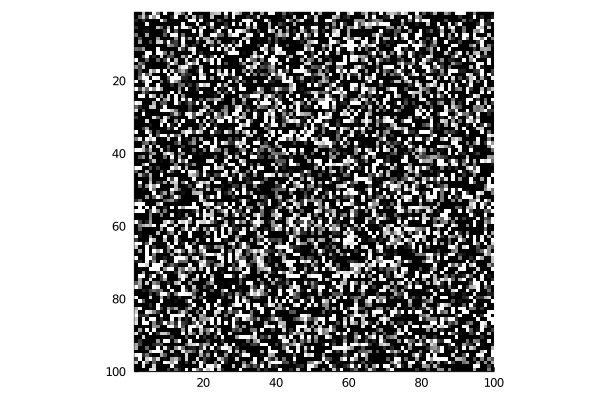

In [71]:

anim = @animate for i ∈ 1:100
    plot(Gray.(randn(100, 100)))
end
gif(anim, "noise.gif", fps=10)

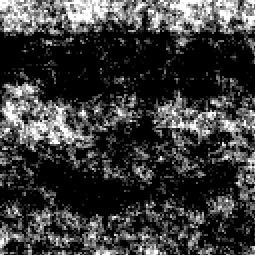

┌ Warning: Output swatches are reduced due to the large size (255×255).
│ Load the ImageShow package for large images.
└ @ Colors /Users/ben/.julia/packages/Colors/kc2v8/src/display.jl:148


In [10]:
size = 8
width = (2^size) -1
height = (2^size)-1
m = Matrix{Float64}(undef, width, height)
for x ∈ 1:width
    for y ∈ 1:height
        m[x,y] = 0
    end
end
m[1,1] = rand()
m[1,width] = rand()
m[height,1] = rand()
m[width,height] = rand()
function getIndex(m,x,y,default)
    xlim, ylim = Base.size(m)
    if x > xlim || x < 1 || y < 1 || y > ylim return default else return m[x,y] end
end
function square(m,x,y,x′,y′)
    xoff = Int(floor((x′ - x) / 2))
    yoff = Int(floor((y′ - y) / 2))
    left = getIndex(m,x+xoff,y,nothing)
    right = getIndex(m,x+xoff,y′,nothing)
    top = getIndex(m,x,y+yoff,nothing)
    bottom = getIndex(m,x′,y+yoff,nothing)
    
    numValid = 0
    numValid += left == nothing ? 0 : 1
    numValid += right == nothing ? 0 : 1
    numValid += top == nothing ? 0 : 1
    numValid += bottom == nothing ? 0 : 1
    average = 0
    average += left == nothing ? 0 : left
    average += right == nothing ? 0 : right
    average += top == nothing ? 0 : top
    average += bottom == nothing ? 0 : bottom
    if numValid == 0 throw("Should be at least one valid square") end
    average = average / numValid
    variation = rand() - 0.5
    m[x+xoff,y+yoff] = average + variation
    recursion = []
    if left != nothing && top != nothing push!(recursion, diamond(m,x,y,x′-xoff,y′-yoff)) end
    if left != nothing && bottom != nothing push!(recursion, diamond(m,x+xoff,y,x′,y′-yoff)) end
    if right != nothing && top != nothing push!(recursion, diamond(m,x,y+yoff,x′-xoff,y′)) end
    if right != nothing && bottom != nothing push!(recursion, diamond(m,x+xoff,y+yoff,x′-xoff,y′-yoff)) end
    return recursion
end
function diamond(m,x,y,x′,y′)
    return function()
        xoff = Int(floor((x′ - x) / 2))
        yoff = Int(floor((y′ - y) / 2))
        if xoff == 0 || yoff == 0 return end
        
        average = ((m[x,y] + m[x,x′] + m[x′,y] + m[x′,y′]) / 4)
        variation = rand() - 0.5
        m[x + xoff, y + yoff] = average + variation
        topRecurse = square(m, x-xoff, y, x′-xoff, y′)
        rightRecurse = square(m, x+xoff, y, x′+xoff, y′)
        leftRecurse = square(m, x, y-yoff, x′, y′-yoff)
        bottomRecurse = square(m, x, y+yoff, x′, y′+yoff)
        for f in topRecurse
            f()
        end
        for f in rightRecurse
            f()
        end
        for f in leftRecurse
            f()
        end
        for f in bottomRecurse
            f()
        end
    end
end
diamond(m,1,1,width,height)()
Gray.(m)